# More Reshaping

In [1]:
import pandas as pd
import seaborn as sns

# make plots look nicer and increase font size
sns.set_theme(font_scale=2)
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

coffee_df = pd.read_csv(arabica_data_url)

# compute ___ per ___
bag_total_df = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

# subset the summary Series for countries with over 15000 total and store as a list
high_prod_countries = list(bag_total_df[bag_total_df>15000].index)

# a lambda function that checks if a string c is one of the
#  countries in high_prod_countries
high_prod = lambda c: c in high_prod_countries

# add a column that indicates that the country is a high producer
coffee_df['high_production'] = coffee_df['Country.of.Origin'].apply(high_prod)



# filter based on production level threshold
high_prod_coffee_df = coffee_df[coffee_df['high_production']]

In [2]:
coffee_df.shape, high_prod_coffee_df.shape

((1311, 45), (732, 45))

replace the FIXMEs in the excerpt tbelo to
reshape the data to have a value column with the value of the score
and a Score column that indicates which score is in that
row. Retaint he country and color for each score, so that they can be used
as grouping variables

In [3]:
# replace the FIXMEs
scores_of_interest = ['Balance','Aroma','Body','Aftertaste']
attrs_of_interest = ['Country.of.Origin','Color']
high_prod_coffee_df_melted = high_prod_coffee_df.melt(
    id_vars = attrs_of_interest,
    value_vars = scores_of_interest,
    var_name = 'Score')

What happened?

In [4]:
high_prod_coffee_df_melted.shape

(2928, 4)

In [5]:
high_prod_coffee_df_melted.head()

,Country.of.Origin,Color,Score,value
0,Guatemala,NaN,Balance,8.42
1,Brazil,Bluish-Green,Balance,8.33
2,Mexico,Green,Balance,8.17
3,Brazil,Green,Balance,8.00
4,Brazil,Green,Balance,8.00


In [6]:
high_prod_coffee_df_melted.sample(5)

,Country.of.Origin,Color,Score,value
345,Mexico,Green,Balance,6.83
117,Colombia,Green,Balance,7.67
642,Mexico,Bluish-Green,Balance,7.17
672,Guatemala,Green,Balance,7.17
1384,Guatemala,Green,Aroma,7.08


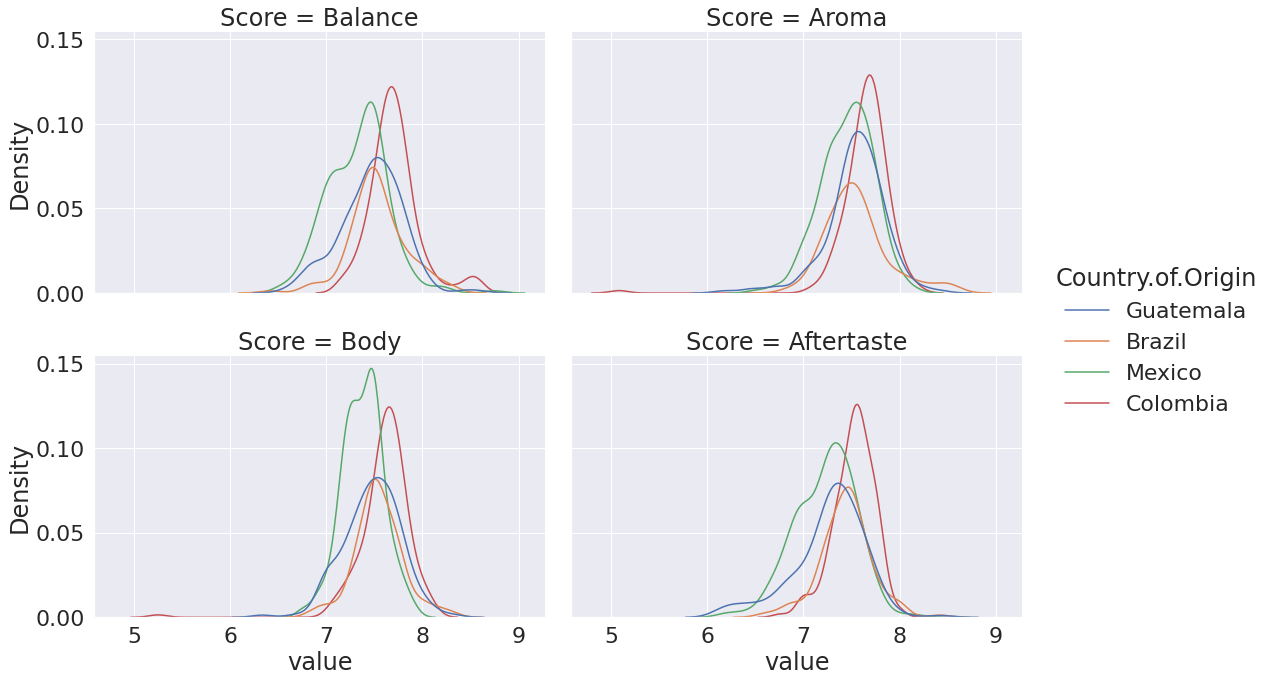

In [7]:
sns.displot(data= high_prod_coffee_df_melted,
           x='value',hue='Country.of.Origin',
           col = 'Score', col_wrap=2, kind='kde',aspect =1.5)

## unpacking Jsons

In [8]:
rhodyprog4ds_gh_events_url = 'https://api.github.com/orgs/rhodyprog4ds/events'
prof_gh_events_url = 'https://api.github.com/users/brownsarahm/events'

In [9]:
course_gh_df = pd.read_json(rhodyprog4ds_gh_events_url)
course_gh_df.head()

,id,type,actor,repo,payload,public,created_at,org
0,18213046815,PushEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8045293565, 'size': 1, 'distinct_s...",True,2021-09-29 22:24:17+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
1,18212484236,PushEvent,"{'id': 41898282, 'login': 'github-actions[bot]...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8045029487, 'size': 1, 'distinct_s...",True,2021-09-29 21:30:45+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
2,18212438695,PushEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8045007990, 'size': 1, 'distinct_s...",True,2021-09-29 21:26:37+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
3,18187502311,PushEvent,"{'id': 41898282, 'login': 'github-actions[bot]...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8033228781, 'size': 1, 'distinct_s...",True,2021-09-28 14:42:58+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."
4,18187438407,PushEvent,"{'id': 10656079, 'login': 'brownsarahm', 'disp...","{'id': 400283911, 'name': 'rhodyprog4ds/BrownF...","{'push_id': 8033198064, 'size': 1, 'distinct_s...",True,2021-09-28 14:39:37+00:00,"{'id': 69595187, 'login': 'rhodyprog4ds', 'gra..."


We want to transform each one of those from a dictionary like thing into a
row in a data frame.

In [10]:
type(course_gh_df['actor'])

pandas.core.series.Series

Recall, that base python types can be used as function, to cast an object from
type to another.

In [11]:
5

5

In [12]:
type(5)

int

In [13]:
str(5)

'5'

How can we unpack one column?
what method used above on a a Series (single column) allowed us to call the same
fucntion on every value in the column?

In [14]:
course_gh_df['actor'].head(2)

0    {'id': 10656079, 'login': 'brownsarahm', 'disp...
1    {'id': 41898282, 'login': 'github-actions[bot]...
Name: actor, dtype: object

In [15]:
course_gh_df['actor'][0]

{'id': 10656079,
 'login': 'brownsarahm',
 'display_login': 'brownsarahm',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/brownsarahm',
 'avatar_url': 'https://avatars.githubusercontent.com/u/10656079?'}

In [16]:
course_gh_df['actor'].apply(pd.Series)

,id,login,display_login,gravatar_id,url,avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
3,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
4,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
5,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
7,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?


HOw can we do this for all of the columns and put them back together after?

In [17]:
js_cols = ['actor','repo','payload','org']

`pd.concat` takes a list of dataframes and puts the together in one DataFrame.

to illustrate, it's nice to make a small small dataFrame.

In [18]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1)

,id,login,display_login,gravatar_id,url,avatar_url,id,name,url,push_id,...,action,number,pull_request,issue,comment,id,login,gravatar_id,url,avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045294e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045029e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045008e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.033229e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.033198e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.027366e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.027347e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.027044e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.026981e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.026353e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


In [19]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=1).shape

(30, 26)

In [20]:
pd.concat([course_gh_df[cur_col].apply(pd.Series) for cur_col in js_cols],
         axis=0).shape

(120, 19)

we might want to rename the new columns so that they have the original column
name prepended to the new name.

pandas has a rename method for this.

and this is another job for lambdas.

In [21]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1)

,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,repo_id,repo_name,repo_url,payload_push_id,...,payload_action,payload_number,payload_pull_request,payload_issue,payload_comment,org_id,org_login,org_gravatar_id,org_url,org_avatar_url
0,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045294e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045029e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.045008e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.033229e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.033198e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.027366e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.027347e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.027044e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,400656699,rhodyprog4ds/rhodyds,https://api.github.com/repos/rhodyprog4ds/rhodyds,8.026981e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,400283911,rhodyprog4ds/BrownFall21,https://api.github.com/repos/rhodyprog4ds/Brow...,8.026353e+09,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?


In [22]:
pd.concat([course_gh_df[cur_col].apply(pd.Series).rename(columns = lambda c: cur_col + '_' +c)
           for cur_col in js_cols],
         axis=1).shape

(30, 26)

How can we append the new columns to the old ones?

In [23]:
pd.concat([course_gh_df[[col for col in
          course_gh_df.columns if not(col in js_cols)]
         ]]+[course_gh_df[col].apply(pd.Series,).rename(
  columns= lambda i_col: col + '_' + i_col )
      for col in js_cols],axis=1)

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_action,payload_number,payload_pull_request,payload_issue,payload_comment,org_id,org_login,org_gravatar_id,org_url,org_avatar_url
0,18213046815,PushEvent,True,2021-09-29 22:24:17+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
1,18212484236,PushEvent,True,2021-09-29 21:30:45+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
2,18212438695,PushEvent,True,2021-09-29 21:26:37+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
3,18187502311,PushEvent,True,2021-09-28 14:42:58+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
4,18187438407,PushEvent,True,2021-09-28 14:39:37+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
5,18174833999,PushEvent,True,2021-09-28 00:36:32+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
6,18174790150,PushEvent,True,2021-09-28 00:33:07+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
7,18174067757,PushEvent,True,2021-09-27 23:37:00+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
8,18173918708,PushEvent,True,2021-09-27 23:25:35+00:00,10656079,brownsarahm,brownsarahm,,https://api.github.com/users/brownsarahm,https://avatars.githubusercontent.com/u/10656079?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
9,18172434203,PushEvent,True,2021-09-27 21:40:50+00:00,41898282,github-actions[bot],github-actions,,https://api.github.com/users/github-actions[bot],https://avatars.githubusercontent.com/u/41898282?,...,NaN,NaN,NaN,NaN,NaN,69595187,rhodyprog4ds,,https://api.github.com/orgs/rhodyprog4ds,https://avatars.githubusercontent.com/u/69595187?
